In [1]:
# Establish Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st 
from pprint import pprint
import numpy as np 

# Set csv location into variable
heart_data = "Resources/heart_data.csv"

# Use Pandas csv reader to review data
heart_data = pd.read_csv(heart_data)

# Rename columns 
heart_data.columns = ['Age', 'Sex', 'Chest Pain', 'Resting Blood Pressure', 'Cholesterol (mg/dl)', 'Fasting Blood Sugar > 120', 'Rest (ECG)', 'Max Heart Rate', 'Exercise Induced Angina', 'ST Depression Induced', 'Slope', 'Number of Major Vessels (ca)', 'NST Result', 'Target']

heart_data.head()

,Age,Sex,Chest Pain,Resting Blood Pressure,Cholesterol (mg/dl),Fasting Blood Sugar > 120,Rest (ECG),Max Heart Rate,Exercise Induced Angina,ST Depression Induced,Slope,Number of Major Vessels (ca),NST Result,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
#Replace numbers on 'Sex' column with its corresponding strings value
heart_data['Sex']=heart_data['Sex'].replace(0, 'Female')
heart_data['Sex']=heart_data['Sex'].replace(1, 'Male')

#Replace numbers on 'Fasting Blood Sugar' column with its corresponding strings value
heart_data['Fasting Blood Sugar > 120']=heart_data['Fasting Blood Sugar > 120'].replace(0,"False")
heart_data['Fasting Blood Sugar > 120']=heart_data['Fasting Blood Sugar > 120'].replace(1,"True")

#Replace numbers on 'ex Agina' column with its corresponding strings value
heart_data['Exercise Induced Angina']=heart_data['Exercise Induced Angina'].replace(0,"No")
heart_data['Exercise Induced Angina']=heart_data['Exercise Induced Angina'].replace(1,"Yes")

#Replace numbers on 'Thal' column with its corresponding strings value
heart_data['NST Result']=heart_data['NST Result'].replace(1,"Normal")
heart_data['NST Result']=heart_data['NST Result'].replace(2,"Fixed Defect")
heart_data['NST Result']=heart_data['NST Result'].replace(3,"Reversible Defect")

#Replace numbers on 'Chest Pain' column with its corresponding strings value
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(0,"Asymptomatic")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(1,"Atypical angina")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(2,"Non-anginal pain")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(3,"Typical angina")

#Replace numbers on 'Target' column with its corresponding strings value
heart_data['Target']=heart_data['Target'].replace(0,"Disease")
heart_data['Target']=heart_data['Target'].replace(1,"No disease")

#Replace numbers on 'Rest (ECG)' column with its corresponding strings value
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(0,"Probable ventricular hypertrophy ")
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(1,"Normal")
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(2,"ST-T wave abnormality")

#Replace numbers on 'Slope' column with its corresponding strings value
heart_data['Slope']=heart_data['Slope'].replace(0,"Downsloping")
heart_data['Slope']=heart_data['Slope'].replace(1,"Flat")
heart_data['Slope']=heart_data['Slope'].replace(2,"Upsloping")

heart_data.head()

,Age,Sex,Chest Pain,Resting Blood Pressure,Cholesterol (mg/dl),Fasting Blood Sugar > 120,Rest (ECG),Max Heart Rate,Exercise Induced Angina,ST Depression Induced,Slope,Number of Major Vessels (ca),NST Result,Target
0,63,Male,Typical angina,145,233,True,Probable ventricular hypertrophy,150,No,2.3,Downsloping,0,Normal,No disease
1,37,Male,Non-anginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Fixed Defect,No disease
2,41,Female,Atypical angina,130,204,False,Probable ventricular hypertrophy,172,No,1.4,Upsloping,0,Fixed Defect,No disease
3,56,Male,Atypical angina,120,236,False,Normal,178,No,0.8,Upsloping,0,Fixed Defect,No disease
4,57,Female,Asymptomatic,120,354,False,Normal,163,Yes,0.6,Upsloping,0,Fixed Defect,No disease


In [3]:
#remove all value 0 on NST Result
heart_data = heart_data[heart_data['NST Result'] != 0]

#remove all value 4 on ca 'Number of Major Vessels (ca)'
heart_data = heart_data[heart_data['Number of Major Vessels (ca)'] != 4]

heart_data.head(50)

,Age,Sex,Chest Pain,Resting Blood Pressure,Cholesterol (mg/dl),Fasting Blood Sugar > 120,Rest (ECG),Max Heart Rate,Exercise Induced Angina,ST Depression Induced,Slope,Number of Major Vessels (ca),NST Result,Target
0,63,Male,Typical angina,145,233,True,Probable ventricular hypertrophy,150,No,2.3,Downsloping,0,Normal,No disease
1,37,Male,Non-anginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Fixed Defect,No disease
2,41,Female,Atypical angina,130,204,False,Probable ventricular hypertrophy,172,No,1.4,Upsloping,0,Fixed Defect,No disease
3,56,Male,Atypical angina,120,236,False,Normal,178,No,0.8,Upsloping,0,Fixed Defect,No disease
4,57,Female,Asymptomatic,120,354,False,Normal,163,Yes,0.6,Upsloping,0,Fixed Defect,No disease
5,57,Male,Asymptomatic,140,192,False,Normal,148,No,0.4,Flat,0,Normal,No disease
6,56,Female,Atypical angina,140,294,False,Probable ventricular hypertrophy,153,No,1.3,Flat,0,Fixed Defect,No disease
7,44,Male,Atypical angina,120,263,False,Normal,173,No,0.0,Upsloping,0,Reversible Defect,No disease
8,52,Male,Non-anginal pain,172,199,True,Normal,162,No,0.5,Upsloping,0,Reversible Defect,No disease
9,57,Male,Non-anginal pain,150,168,False,Normal,174,No,1.6,Upsloping,0,Fixed Defect,No disease


In [4]:
#Create Data Frame for those who are diseased and those who are not
disease_df = heart_data[heart_data['Target'] == 'Disease']
no_disease_df = heart_data[heart_data['Target'] == 'No disease']

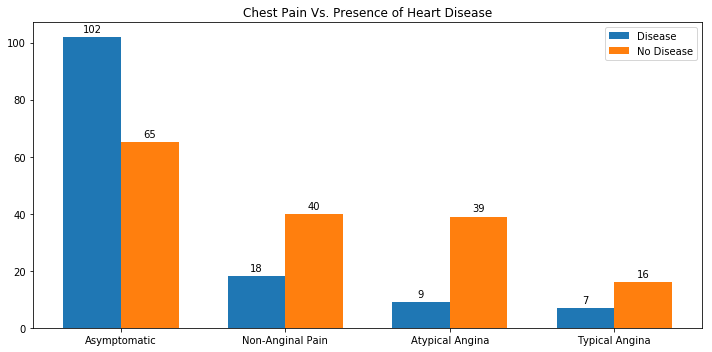

In [5]:
# Chest pain vs. Heart Disease Bar Chart
labels = ['Asymptomatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina']
disease_pain_list = disease_df['Chest Pain'].value_counts()
no_disease_pain_list = no_disease_df['Chest Pain'].value_counts()

#Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar((x - width/2), disease_pain_list, width, label='Disease')
rects2 = ax.bar((x + width/2), no_disease_pain_list, width, label='No Disease')

#Add labels, title , axis tic labels
ax.set_ylabel('')
ax.set_title('Chest Pain Vs. Presence of Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Text(0.5,1,'Cholesterol Level Vs. Presence of Heart Disease ')

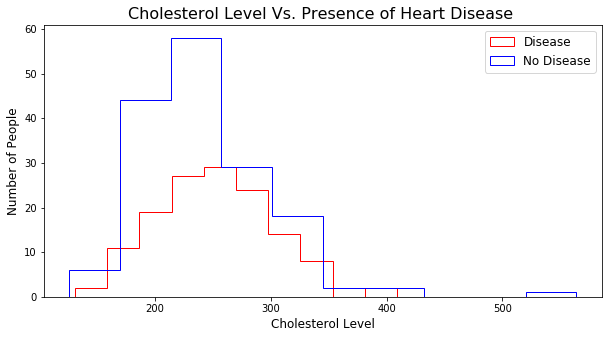

In [6]:
#Cholesterol vs Heart Disease graph
disease_ages = disease_df['Cholesterol (mg/dl)']
no_disease_ages = no_disease_df['Cholesterol (mg/dl)']
plt.figure(figsize=(10,5))
plt.hist(disease_ages, histtype = 'step', color='red')
plt.hist(no_disease_ages, histtype = 'step', color='blue')
plt.legend(['Disease', 'No Disease'], fontsize = 12)
plt.xlabel('Cholesterol Level', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Cholesterol Level Vs. Presence of Heart Disease ', fontsize = 16)